In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


In [ ]:
data_dir = 'Augmentation_Root'
save_dir = 'augmented_images_output'

os.makedirs(save_dir, exist_ok=True)


In [3]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [7]:
for subdir in os.listdir(data_dir):
    subfolder_path = os.path.join(data_dir, subdir)
    save_subdir = os.path.join(save_dir, subdir)
    os.makedirs(save_subdir, exist_ok=True)

    if os.path.isdir(subfolder_path):
        for fname in os.listdir(subfolder_path):
            if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(subfolder_path, fname)
                img = load_img(img_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)

                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=save_subdir,
                                          save_prefix='augmentation', save_format='jpg'):
                    i += 1
                    if i >= 1:  # Generate 5 augmented images per original
                        break


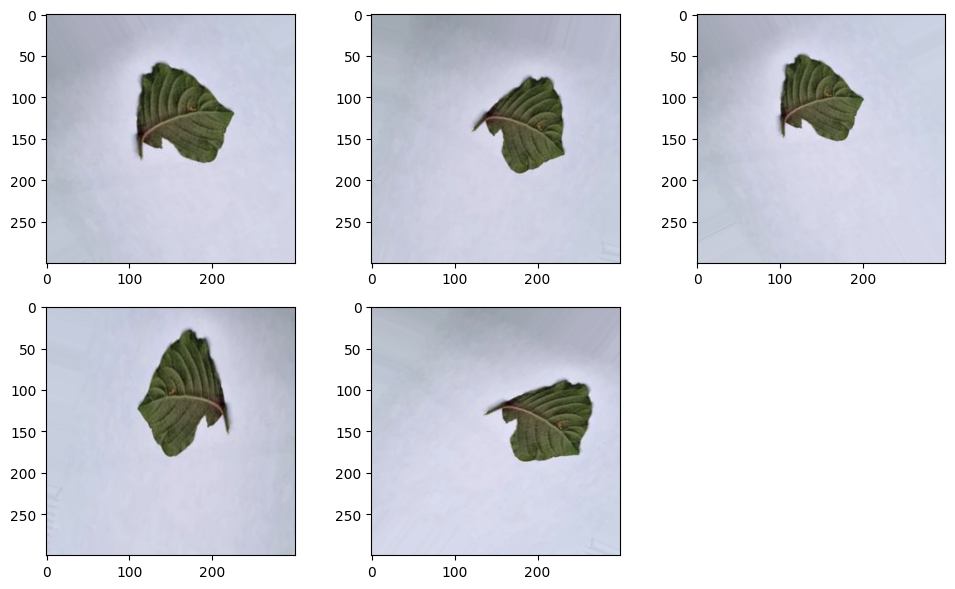

In [ ]:
img = load_img(os.path.join(data_dir, '1_3_apang', 'apang_13_org.jpg'))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

plt.figure(figsize=(10, 6))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 3, i+1)
    plt.imshow(array_to_img(batch[0]))
    i += 1
    if i >= 5:
        break
plt.tight_layout()
plt.show()
